# References

1. https://python.quantecon.org/wealth_dynamics.html
2. https://towardsdatascience.com/measuring-statistical-dispersion-with-the-gini-coefficient-22e4e63463af 
3. https://geographicdata.science/book/notebooks/09_spatial_inequality.html
4. https://www.statsdirect.com/help/nonparametric_methods/gini_coefficient.htm
5. https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data
6. https://pypi.org/project/wbgapi/

# 1. Introduction

Inequality is one of the subjects evoking immense interest from welfare economists. It essentially concerns with the distribution of benefits of economic growth. High inequality is often said to be self-reinforcing. The rich, having more political power, use it to promote own interests and entrench their relative position in the society. The negative effects due to exclusion and lack of equal opportunity are made permanent thereby perpetuating greater inequality. It can give rise to social unrest threating the smooth functioning of political economy. Therefore, measuring inequality is of central importance in welfare economics. Economists have used several indexes to study the connection between growth and inequality.  Some common statistical measures include coefficient of variation, Lorenz Curve, Gini coefficient and Theils Index. Each measure has its own merits and shortcomings. Despite being very common tools in economics, there is lack of adequate resources illustrating their application using general programming languages such as R and Python. This piece is a modest attempt to fill this gap by discussing their implementation with Python. 


# 2. Data Collection and Processing

We will work with per capita GDP (constant 2017 PPP$) from World Development Indicator database of World Bank. This data and a host of other indicators are available easily through their World Bank's Python API – WBGAPI. For more on this, I encourage you to checkout the documentation available on PyPI.

In [1]:
# Import libraries
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt

# Import GDP per capita (PPP Constant international $)
pcgdp_long = wb.data.DataFrame(['NY.GDP.PCAP.PP.KD'], time=range(2000, 2020), skipBlanks=True, columns='series').reset_index()

# Rearrange data in wide form and drop countries for which data for all years are not available
pcgdp_wide = pd.pivot_table(pcgdp_long, values='NY.GDP.PCAP.PP.KD', index = 'economy', columns='time').dropna()

In [2]:
pcgdp_wide

time,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,
AFE,2961.593818,2991.629179,3023.878501,3035.186444,3122.581997,3230.514516,3354.945859,3487.024074,3546.444897,3481.931798,3567.520260,3614.470120,3605.623578,3655.576214,3705.815764,3722.481834,3717.632922,3721.613289,3721.733900,3704.951987
AFW,2690.555842,2756.601768,2935.488039,3014.538598,3165.091104,3258.736507,3341.068388,3426.184540,3540.921917,3652.114032,3794.179493,3872.809123,3966.071236,4092.768632,4215.646002,4216.409206,4121.234849,4115.645480,4132.592996,4159.302886
AGO,4727.966314,4766.836736,5240.839433,5218.207712,5593.243624,6210.222188,6681.101028,7341.865199,7864.374579,7643.495786,7692.434286,7675.446085,8036.692402,8140.525973,8239.830672,8036.410898,7568.998168,7310.896589,6933.499934,6670.331458
ALB,5892.593644,6441.453218,6753.894318,7154.009304,7580.142847,8040.097004,8568.566388,9150.134605,9912.167736,10313.921758,10749.487320,11052.799417,11227.972231,11361.274574,11586.839967,11878.460689,12291.865951,12770.971001,13317.099311,13656.599925
ARB,10908.575238,10867.142208,10700.095774,10975.370421,11657.753494,12006.588954,12404.558816,12655.345516,13062.958974,12835.320462,13113.986909,13277.079271,13662.227983,13767.627240,13836.903648,14061.626277,14254.597989,14158.444036,14251.780320,14284.547283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLD,11095.361210,11204.149478,11361.861183,11637.760171,12077.139363,12471.124346,12950.091748,13451.777387,13640.455942,13381.072806,13890.004094,14258.223966,14526.162810,14821.846175,15146.794133,15477.906406,15800.510277,16207.994529,16603.793873,16893.505266
WSM,4812.773207,5119.184808,5310.798281,5517.111596,5736.208785,5937.234482,6015.568062,6354.769522,6375.990014,6027.220791,6010.083942,6205.819827,5901.347415,5831.095681,5788.367953,5996.842054,6449.829740,6489.776786,6384.582583,6631.587054
ZAF,11033.856309,11181.689211,11449.818315,11644.099767,12027.080619,12506.002121,13040.979904,13563.726871,13811.061054,13410.715319,13618.725255,13837.668785,13946.947843,14066.102782,14040.825911,14010.104418,13897.139368,13860.270166,13875.935249,13709.966375


# 3. Calculation of Statistical Indexes



### 3.1. Coefficient of Variation

The coefficient of variation (CV) is a statistical measure of the relative dispersion of data points in a data series around the mean. In plain English, the coefficient of variation is simply the ratio between the standard deviation and the mean.

$ CV = \Large \frac{\sigma}{\mu}$

The `Scipy` library provides a class for easy implementation of this measure.

In [3]:
from scipy import stats
cv = pcgdp_wide.apply(stats.variation, axis = 0)

### 3.2. Lorenz Curve

Lorenz Curve was introduced by Max Lorenz in 1905. We can construct the Lorenz curve for any given year by computing the proportion of countries that are below each observation. For that, we generate a cumulative series.

* First, we sort countries by their incomes in ascending order.
* Second, we compute the percentage of countries that are below each observation.
* Third, we find out the income of each country as percentage of total income all countries put together. 
* Fourth, We construct the cumulative sum of income percentages.
* Fifth, we can plot the Lorenz curve by plotting the cumulative percentage of countries and cumulative sum of income percentages obtained in steps 2 and 4.


In the code block below, we will generate the Lorenz Curve for all the years beginning 2000 to 2020 and combine them in a gif file using `screentogif` utility.

In [88]:
# Function to plot Lorenz Curve
import quantecon as qe

timespan = ['YR'+str(i) for i in range(2000,2020,1)]

fig, ax = plt.subplots()
plt.close()

def animate(y):
    fig, ax = plt.subplots(figsize=(6,6))
    f_vals, l_vals = qe.lorenz_curve(pcgdp_wide[y].values)
    ax.set_aspect(1.0) #sets the height to width ratio to 1.5. 
    ax.plot(f_vals, l_vals, label='LC, Per Capita GDP PPP $')
    ax.plot(f_vals, f_vals, label='LC, equality')
    ax.fill(f_vals, l_vals, "c")
    ax.annotate('{}, G={:.4f}'.format(y, qe.gini_coefficient(pcgdp_wide[y].values)), xy=(0.25, 0.75))
    ax.legend()
    plt.show()


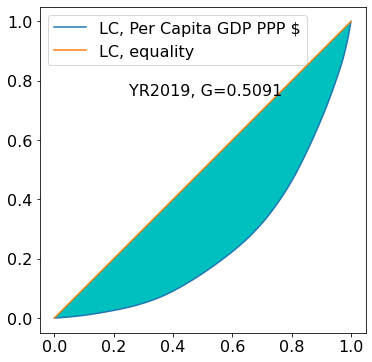

In [92]:
# Plotting the Lorenc Curve for each year 
from IPython.display import clear_output
import matplotlib.pyplot as plt
from time import sleep
plt.rcParams['font.size'] = '16'

for i in timespan:
  animate(i)
  sleep(0.5)
  clear_output(wait=True)

### 3.3. Gini Coefficient

The Gini coefficient was developed by the Italian Statistician Corrado Gini (Gini, 1912) as an aggregate measure of income inequality. It is represented by the area between the Lorenz curve and line of perfect equality (45-degree line). Although most commonly used indicator, Gini is criticised for its large scale aggregate nature rendering it a weak in estimating inequality at various levels of income distribution. 



Source: Wikimedia Commons.


G is a measure of inequality, defined as the mean of absolute differences between all pairs of individuals for some measure. The minimum value is 0 when all measurements are equal and the theoretical maximum is 1 for an infinitely large set of observations where all measurements but one has a value of 0, which is the ultimate inequality

$  \Large G = \frac{\sum_{i=1}^N \sum_{j=1}^N |x_i - x_j|}{2n^2 \bar x} $
where $\bar x$ is the mean value

As much as this formula is frightening, its Python implementation makes it a cakewalk. We can use either `pysal` or `quantecon` libraries to calculate the Gini coefficient. 


In [93]:
# Method 1: Using pysal library
from pysal.explore import inequality

gini = pcgdp_wide.apply(inequality.gini.Gini, axis = 0)

# Method 2: Using quantecon library
import quantecon as qe

gini = pcgdp_wide.apply(lambda x: qe.gini_coefficient(x.values), axis = 0)


C:\Users\shashikant\anaconda3\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
C:\Users\shashikant\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


### 3.4. Theils Index

Theils Index was proposed by a Dutch econometrician Henri Theil from Erasmus University Amsterdam. In plain English words, it is the average of logarithms of income shares weighted by income shares.

$ \Large T=  \frac{1}{N}\sum \limits_{i=1}^N \Bigg(\frac{x_i}{\bar x} ln \frac{x_i}{\bar x}\Bigg)$

where $x_i$ is income of ith individual and $\bar x$ is average income for the population.


Conceptually, you may find that this metric resembles a term called entropy in high school Physics/Chemistry. That's correct. It is nothing but the entropy of income distribution measuring how evenly-distributed incomes are across the population.

The Theil index is also available in PySAL’s inequality module.



In [94]:
# Using pysal
from pysal.explore import inequality

theil = pcgdp_wide.apply(lambda x: inequality.theil.Theil(x).T, axis=0)

# 4. Conclusion

We put together all the three inequality indexes together in a dataframe to observe their variation over the timespan of 20 years using the code snippet below. We notice that all indexes broadly capture the same trend with decrasing inequality in per capita incomes of countries. This indicates that gap between rich and poor countries is coming down as far as per capita incomes are concerned. 

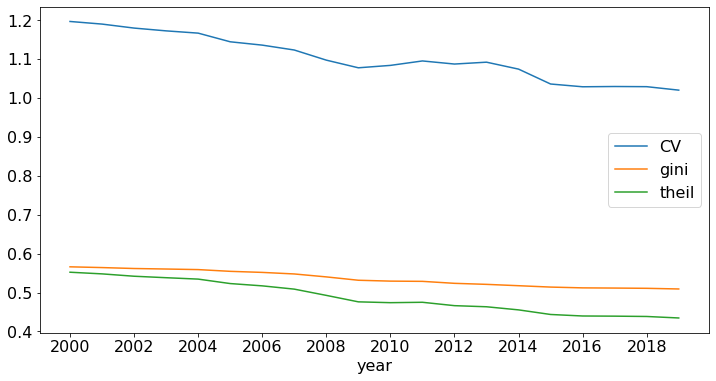

In [99]:
df = pd.DataFrame({'year':range(2000, 2020,1),
              'CV': cv,
             'gini': gini,
             'theil': theil})

df.set_index('year').plot(figsize=(12,6));
plt.xticks(range(2000, 2020,2))

plt.show()

In this blog, we discussed some commonly used statistical indexes for measuring inequality viz. CV, Lornz Curve, Gini and Theils; and their implementation using Python. There are few libararies which make it easy to work out the values of these indices by invoking just a one-line function.

### Before we wind up,

I invite you to join me in this exciting data science odyssey. Follow my medium page to explore more exciting content about data science.